<a href="https://colab.research.google.com/github/Brun0oO/Colab/blob/main/fastapi_colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Install Required python library**

In [ ]:
!pip install fastapi nest-asyncio pyngrok uvicorn python-multipart qrcode

# **Simple FastAPI Server**

The following code launches a fastapi server delevering RESTful APIs available through a ngrok tunnel. 

Public URL: http://ae077870e0ef.ngrok.io


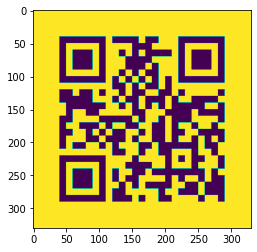

INFO:     Started server process [541]
INFO:     Waiting for application startup.
INFO:     Application startup complete.
INFO:     Uvicorn running on http://127.0.0.1:8000 (Press CTRL+C to quit)


INFO:     2a01:e0a:1bd:97f0:a8d2:10c1:9e5:754a:0 - "GET / HTTP/1.1" 200 OK
INFO:     2a01:e0a:1bd:97f0:a8d2:10c1:9e5:754a:0 - "GET /favicon.ico HTTP/1.1" 404 Not Found
INFO:     67.219.192.37:0 - "GET / HTTP/1.1" 200 OK
INFO:     2a01:e0a:1bd:97f0:a8d2:10c1:9e5:754a:0 - "GET /docs HTTP/1.1" 200 OK
INFO:     2a01:e0a:1bd:97f0:a8d2:10c1:9e5:754a:0 - "GET /openapi.json HTTP/1.1" 200 OK
INFO:     193.51.224.134:0 - "GET /docs HTTP/1.1" 200 OK
INFO:     2a01:e0a:1bd:97f0:a8d2:10c1:9e5:754a:0 - "POST /analyze/ HTTP/1.1" 200 OK


INFO:     Shutting down
INFO:     Waiting for application shutdown.
INFO:     Application shutdown complete.
INFO:     Finished server process [541]


In [ ]:

from fastapi import FastAPI, UploadFile, File, Form, HTTPException
from fastapi.responses import HTMLResponse, RedirectResponse


import nest_asyncio
from pyngrok import ngrok
import uvicorn
import io

import pathlib
from PIL import Image

import qrcode
import matplotlib.pyplot as plt
from time import sleep

def createQRCode(text):
  qr = qrcode.QRCode(
      version=1,
      error_correction=qrcode.constants.ERROR_CORRECT_L,
      box_size=10,
      border=4,
  )
  qr.add_data(text)
  qr.make(fit=True)

  return qr.make_image(fill_color="black", back_color="white")  


def processImage(img):
  result = [img.width, img.height]
  return result

app = FastAPI()

@app.get('/', response_class=HTMLResponse)
async def home():
  result = """
<h1>FastAPI with Colab is great!</h1>
<br>
<p>Some useful links:</p>
<ul>
  <li><a href="%s/docs">automatic interactive API documentation</a></li>
</ul>
  """ % (ngrok_tunnel.public_url)
  return result

@app.post("/analyze/")
async def analyze(image: UploadFile = File(...)):
  extension = pathlib.Path(image.filename).suffix.lower()
  if not(extension in ['.png', '.jpg', '.jpeg']):
    raise HTTPException(status_code=400, detail="bad parameter, waiting for a .png or .jpg filename !")

  contents = await image.read()
  img = Image.open(io.BytesIO(contents))
  result = processImage(img)
  return {'msg': 'success', 'result': result}

@app.get("/docs")
async def docs_redirect():
  response = RedirectResponse(url='/docs')
  return response



ngrok_tunnel = ngrok.connect(8000)
print('Public URL:', ngrok_tunnel.public_url)
qrcode = createQRCode(ngrok_tunnel.public_url)
plt.imshow(qrcode)
plt.show()
sleep(0.5)
nest_asyncio.apply()
uvicorn.run(app, port=8000)